In [67]:
from generate_data import generate_data
from genetic import GeneticAlgorithm
from simulated_annealing import SimulatedAnnealing
from constraint_satisfaction import ConstraintSatisfactionApproach

import time

In [133]:
data = generate_data(size=12, complexity=0.56)
for k,v in data.items():
    print(f"{k}: {v}")

course_details: {'CS101': {'department': 'CS', 'students': 28, 'instructor': 'Dr. Alice Smith'}, 'CS104': {'department': 'CS', 'students': 32, 'instructor': 'Dr. David Lee'}, 'Math201': {'department': 'Math', 'students': 35, 'instructor': 'Dr. Frank Miller'}, 'Math203': {'department': 'Math', 'students': 33, 'instructor': 'Dr. Helen Taylor'}, 'Math204': {'department': 'Math', 'students': 29, 'instructor': 'Dr. Ian Anderson'}, 'Phys301': {'department': 'Physics', 'students': 22, 'instructor': 'Dr. Kevin Moore'}, 'Chem403': {'department': 'Chem', 'students': 26, 'instructor': 'Dr. Rachel Walker'}, 'Bio505': {'department': 'Bio', 'students': 24, 'instructor': 'Dr. Yvonne Green'}, 'EE302': {'department': 'EE', 'students': 30, 'instructor': 'Dr. Alicia Baker'}, 'ME202': {'department': 'ME', 'students': 27, 'instructor': 'Dr. Derek Foster'}, 'Hist501': {'department': 'History', 'students': 40, 'instructor': 'Dr. Gloria Martin'}, 'Eng201': {'department': 'English', 'students': 29, 'instructor

In [134]:
genetic = GeneticAlgorithm(data=data, population_size=50, generations=2000, mutation_rate=0.05)
sim_ann = SimulatedAnnealing(data=data, initial_temperature=1000000, cooling_rate=0.9, max_iter=10000)
# sim_ann = SimulatedAnnealing(data=data, initial_temperature=100, cooling_rate=0.5, max_iter=1000000)
csp = ConstraintSatisfactionApproach(data=data)

# ALGORITMALAR

Found a constraint-free schedule in generation 0.
Best Schedule Found:
Course     Instructor                Time   Room  Room Cap   Course Cap
Bio505     Dr. Yvonne Green          T-14   R6    60         24
CS101      Dr. Alice Smith           Th-15  R4    35         28
CS104      Dr. David Lee             M-11   R4    35         32
Chem403    Dr. Rachel Walker         T-14   R11   50         26
EE302      Dr. Alicia Baker          Th-08  R11   50         30
Eng201     Dr. Karen Scott           W-13   R2    45         29
Hist501    Dr. Gloria Martin         Th-10  R1    50         40
ME202      Dr. Derek Foster          Th-15  R1    50         27
Math201    Dr. Frank Miller          M-11   R6    60         35
Math203    Dr. Helen Taylor          M-13   R11   50         33
Math204    Dr. Ian Anderson          W-13   R5    30         29
Phys301    Dr. Kevin Moore           T-14   R2    45         22
Cost: 0


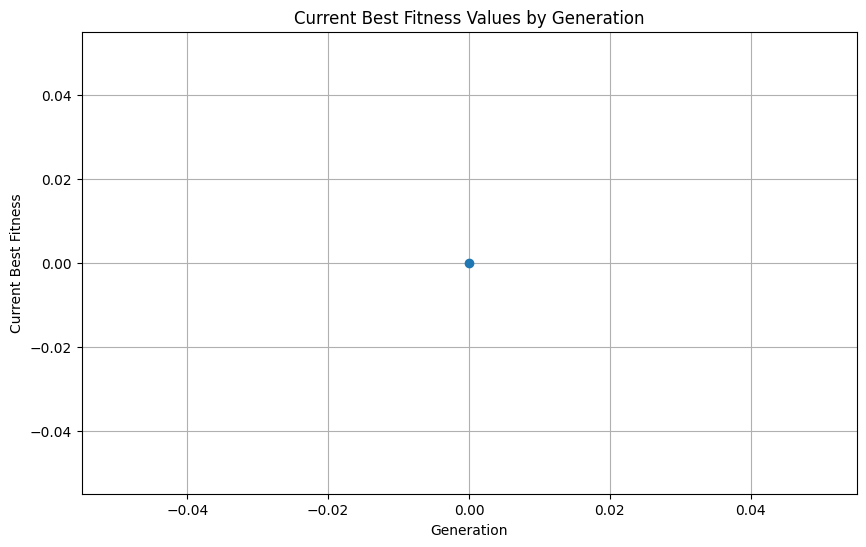

In [138]:
genetic.run()
genetic.print_best_schedule()
genetic.plot_fitness_history()

Best Schedule Found:
Course     Instructor                Time   Room  Room Cap   Course Cap
Bio505     Dr. Yvonne Green          M-10   R1    50         24
CS101      Dr. Alice Smith           T-16   R1    50         28
CS104      Dr. David Lee             Th-16  R2    45         32
Chem403    Dr. Rachel Walker         Th-16  R11   50         26
EE302      Dr. Alicia Baker          M-10   R5    30         30
Eng201     Dr. Karen Scott           T-14   R2    45         29
Hist501    Dr. Gloria Martin         W-11   R6    60         40
ME202      Dr. Derek Foster          F-10   R6    60         27
Math201    Dr. Frank Miller          F-14   R1    50         35
Math203    Dr. Helen Taylor          Th-08  R2    45         33
Math204    Dr. Ian Anderson          W-13   R1    50         29
Phys301    Dr. Kevin Moore           Th-15  R1    50         22
Cost: 0


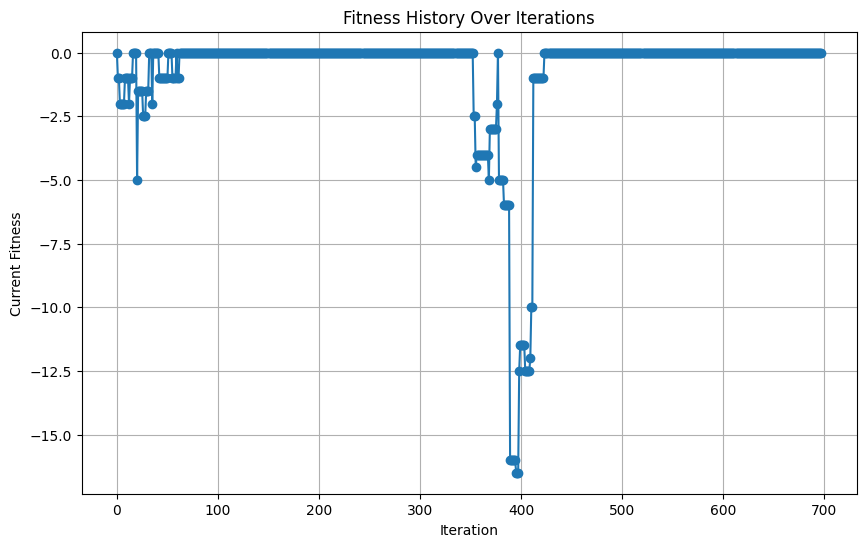

In [137]:
sim_ann.run()
sim_ann.print_best_schedule()
sim_ann.plot_fitness_history()

In [135]:
csp.run()
csp.print_best_schedule()

Solution Found:
Course     Instructor                Time   Room  Room Cap   Course Cap
Bio505     Dr. Yvonne Green          Th-15  R11   50         24
CS101      Dr. Alice Smith           T-10   R6    60         28
CS104      Dr. David Lee             M-10   R6    60         32
Chem403    Dr. Rachel Walker         Th-15  R2    45         26
EE302      Dr. Alicia Baker          Th-15  R5    30         30
Eng201     Dr. Karen Scott           Th-15  R4    35         29
Hist501    Dr. Gloria Martin         Th-15  R6    60         40
ME202      Dr. Derek Foster          M-10   R5    30         27
Math201    Dr. Frank Miller          M-10   R1    50         35
Math203    Dr. Helen Taylor          Th-15  R1    50         33
Math204    Dr. Ian Anderson          Th-16  R5    30         29
Phys301    Dr. Kevin Moore           Th-16  R6    60         22
Nodes Explored: 13


# KIYASLAMA

In [13]:
complexity_levels = [0.1, 0.3, 0.5, 0.7]
size = 60

ga_params_list = [
    {"population_size": 100, "generations": 1000, "mutation_rate": 0.1},
    {"population_size": 200, "generations": 2000, "mutation_rate": 0.05},
    {"population_size": 300, "generations": 3000, "mutation_rate": 0.01},
]

sa_params_list = [
    {"initial_temperature": 1000, "cooling_rate": 0.99, "max_iter": 10000},
    {"initial_temperature": 500, "cooling_rate": 0.95, "max_iter": 5000},
    {"initial_temperature": 200, "cooling_rate": 0.9, "max_iter": 1000},
]
results = []

In [14]:
for complexity in complexity_levels:
    # Generate data with the current complexity
    data = generate_data(size=size, complexity=complexity)
    print("=== Running experiments for dataset complexity:", complexity, "===")
    
    # --- Genetic Algorithm experiments ---
    for params in ga_params_list:
        ga = GeneticAlgorithm(
            data=data,
            population_size=params["population_size"],
            generations=params["generations"],
            mutation_rate=params["mutation_rate"]
        )
        start_time = time.time()
        ga.run()
        elapsed_time = time.time() - start_time
        best_cost = -ga.fitness(ga.best_individual)  # lower cost is better (0 is optimal)
        results.append({
            "algorithm": "GeneticAlgorithm",
            "complexity": complexity,
            "params": params,
            "best_cost": best_cost,
            "time": elapsed_time
        })
        print("GA Params:", params, "-> Best Cost:", best_cost, "Time: {:.4f}s".format(elapsed_time), end="\n--\n")

=== Running experiments for dataset complexity: 0.1 ===
Found a constraint-free schedule in generation 15.
GA Params: {'population_size': 100, 'generations': 1000, 'mutation_rate': 0.1} -> Best Cost: 0 Time: 0.1038s
--
Found a constraint-free schedule in generation 7.
GA Params: {'population_size': 200, 'generations': 2000, 'mutation_rate': 0.05} -> Best Cost: 0 Time: 0.0918s
--
Found a constraint-free schedule in generation 5.
GA Params: {'population_size': 300, 'generations': 3000, 'mutation_rate': 0.01} -> Best Cost: 0 Time: 0.1032s
--
=== Running experiments for dataset complexity: 0.3 ===
Found a constraint-free schedule in generation 457.
GA Params: {'population_size': 100, 'generations': 1000, 'mutation_rate': 0.1} -> Best Cost: 0 Time: 2.6796s
--
Found a constraint-free schedule in generation 59.
GA Params: {'population_size': 200, 'generations': 2000, 'mutation_rate': 0.05} -> Best Cost: 0 Time: 0.7114s
--
Found a constraint-free schedule in generation 21.
GA Params: {'populat

In [15]:
for complexity in complexity_levels:
    # Generate data with the current complexity
    data = generate_data(size=size, complexity=complexity)
    print("=== Running experiments for dataset complexity:", complexity, "===")
    # --- Simulated Annealing experiments ---
    for params in sa_params_list:
        sa = SimulatedAnnealing(
            data=data,
            initial_temperature=params["initial_temperature"],
            cooling_rate=params["cooling_rate"],
            max_iter=params["max_iter"]
        )
        start_time = time.time()
        sa.run()
        elapsed_time = time.time() - start_time
        best_cost = -sa.fitness(sa.best_individual)
        results.append({
            "algorithm": "SimulatedAnnealing",
            "complexity": complexity,
            "params": params,
            "best_cost": best_cost,
            "time": elapsed_time
        })
        print("SA Params:", params, "-> Best Cost:", best_cost, "Time: {:.4f}s".format(elapsed_time))

=== Running experiments for dataset complexity: 0.1 ===
SA Params: {'initial_temperature': 1000, 'cooling_rate': 0.99, 'max_iter': 10000} -> Best Cost: 0 Time: 0.1413s
SA Params: {'initial_temperature': 500, 'cooling_rate': 0.95, 'max_iter': 5000} -> Best Cost: 0 Time: 0.0267s
SA Params: {'initial_temperature': 200, 'cooling_rate': 0.9, 'max_iter': 1000} -> Best Cost: 0 Time: 0.0125s
=== Running experiments for dataset complexity: 0.3 ===
SA Params: {'initial_temperature': 1000, 'cooling_rate': 0.99, 'max_iter': 10000} -> Best Cost: 0 Time: 0.1453s
SA Params: {'initial_temperature': 500, 'cooling_rate': 0.95, 'max_iter': 5000} -> Best Cost: 0 Time: 0.0258s
SA Params: {'initial_temperature': 200, 'cooling_rate': 0.9, 'max_iter': 1000} -> Best Cost: 0 Time: 0.0121s
=== Running experiments for dataset complexity: 0.5 ===
SA Params: {'initial_temperature': 1000, 'cooling_rate': 0.99, 'max_iter': 10000} -> Best Cost: 0 Time: 0.1354s
SA Params: {'initial_temperature': 500, 'cooling_rate': 0.

In [16]:
for complexity in complexity_levels:
    # Generate data with the current complexity
    data = generate_data(size=size, complexity=complexity)
    print("=== Running experiments for dataset complexity:", complexity, "===")    
    # --- Constraint Satisfaction experiment ---
    # (Note: CSP is not parameterized and ideally finds a solution that satisfies all constraints.)
    csp = ConstraintSatisfactionApproach(data=data)
    start_time = time.time()
    solution = csp.run()
    elapsed_time = time.time() - start_time
    if solution is not None:
        best_cost = 0  # All constraints are satisfied in a valid CSP solution.
    else:
        best_cost = None
    results.append({
        "algorithm": "ConstraintSatisfaction",
        "complexity": complexity,
        "params": {},
        "best_cost": best_cost,
        "time": elapsed_time,
        "nodes_explored": csp.nodes_explored
    })
    print("CSP -> Best Cost:", best_cost, ", Time: {:.4f}s".format(elapsed_time),
          ", Nodes Explored:", csp.nodes_explored)
    print("-" * 80)

=== Running experiments for dataset complexity: 0.1 ===
CSP -> Best Cost: 0 , Time: 0.0026s , Nodes Explored: 61
--------------------------------------------------------------------------------
=== Running experiments for dataset complexity: 0.3 ===
CSP -> Best Cost: 0 , Time: 0.0020s , Nodes Explored: 61
--------------------------------------------------------------------------------
=== Running experiments for dataset complexity: 0.5 ===
CSP -> Best Cost: 0 , Time: 0.0018s , Nodes Explored: 61
--------------------------------------------------------------------------------
=== Running experiments for dataset complexity: 0.7 ===


KeyboardInterrupt: 